# Proyecto 2

**Tema:** Predicción de enfermedades Cardíacas


|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Modelo - Aprendizaje de Estructura - Puntajes - K2

## Librerías Requeridas

In [1]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.readwrite import BIFWriter

## Carga de Datos

In [2]:
df = pd.read_csv("../../../Data/Transformed/Discrete.csv")

## K2 Score

### Estimación Estructura

In [3]:
scoring_method = K2Score(data=df)
esth = HillClimbSearch(data=df)

estimated_model_k2 = esth.estimate(
    scoring_method=scoring_method,
    max_indegree=4,
    max_iter=int(1e4)
)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [4]:
print(estimated_model_k2)
print(estimated_model_k2.nodes())
print(estimated_model_k2.edges())

DAG with 14 nodes and 22 edges
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdis']
[('sex', 'chol'), ('sex', 'heartdis'), ('cp', 'trestbps'), ('trestbps', 'age'), ('restecg', 'chol'), ('restecg', 'thalach'), ('exang', 'thalach'), ('exang', 'chol'), ('exang', 'trestbps'), ('exang', 'cp'), ('slope', 'oldpeak'), ('slope', 'thalach'), ('ca', 'age'), ('thal', 'heartdis'), ('thal', 'sex'), ('heartdis', 'cp'), ('heartdis', 'ca'), ('heartdis', 'slope'), ('heartdis', 'exang'), ('heartdis', 'oldpeak'), ('heartdis', 'chol'), ('heartdis', 'restecg')]


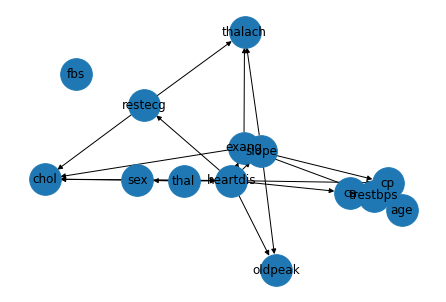

In [5]:
nodes = list(estimated_model_k2.nodes())
edges = list(estimated_model_k2.edges())

# Create Graph
G = nx.DiGraph()

# Add Nodes
for node in nodes:
    G.add_node(node)
    
# Add Edges
for edge in edges:
    G.add_edge(edge[0], edge[1])
    
# Draw Graph
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=1000, arrows=True)
plt.show()

In [6]:
print(scoring_method.score(estimated_model_k2))

-3418.81522161635


### Red Bayesiana

In [7]:
model = BayesianNetwork(estimated_model_k2)
model.fit(data=df, estimator=MaximumLikelihoodEstimator)

In [8]:
for i in model.nodes():
    print(model.get_cpds(i))

+----------+---------------------+-----+-------------+-------------+
| ca       | ca(0)               | ... | ca(3)       | ca(3)       |
+----------+---------------------+-----+-------------+-------------+
| trestbps | trestbps(1)         | ... | trestbps(1) | trestbps(2) |
+----------+---------------------+-----+-------------+-------------+
| age(1)   | 0.46153846153846156 | ... | 0.0         | 0.1         |
+----------+---------------------+-----+-------------+-------------+
| age(2)   | 0.27884615384615385 | ... | 0.4         | 0.1         |
+----------+---------------------+-----+-------------+-------------+
| age(3)   | 0.14423076923076922 | ... | 0.2         | 0.1         |
+----------+---------------------+-----+-------------+-------------+
| age(4)   | 0.11538461538461539 | ... | 0.4         | 0.7         |
+----------+---------------------+-----+-------------+-------------+
+--------+---------------------+---------------------+--------------------+
| thal   | thal(3)         

### Guardar Modelo

In [9]:
writer = BIFWriter(model)
writer.write_bif('../../../Data/Models/Estructura_Puntaje_K2.bif')